In [258]:
import pandas as pd
# import pandasql as ps
import matplotlib.pyplot as plt
# Import argsort
from numpy import argsort
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *


## Connection to databse

In [259]:
alertP1=connection("/Users/MarouanKamoun/Desktop/HGO pbl/credentials.csv")

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',), ('hgo_data_032023',)]
72


## Data cleaning

In [260]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\data_cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'


In [261]:
#adding features
text_length(alertP1)
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
speciality(alertP1)
alertP1=unit(alertP1)
alertP1

c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['step'][alertP1['step']>=3]='3+'
c:\Users\MarouanKamoun\Desktop\HGO pbl\PBL-HGO\PBL-HGO\Functions\AlertP1\features.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['unit'][alertP1['TIPO_UNID']!='CS/USF']='HOSP'


,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,resume saída,mês_saida,ano_saida,Texto,result,text_length,area,step,speciality_type,unit
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,CTH,3,Normal,...,12/06/2015,6,2015,"Utente de 75 anos, refere tremor desde há 5 an...",1,701,inside area,1,General Neurology,USF
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,,unknown,...,02/07/2012,7,2012,Avaliação neurologica para avaliação da toma d...,1,363,inside area,1,General Neurology,USF
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,SAM,,unknown,...,13/01/2015,1,2015,cefaleias,1,9,outside area,1,Other specialities,HOSP
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,unknown,...,03/12/2013,12,2013,"Utente do sexo feminino com 30 anos de idade, ...",1,417,inside area,1,General Neurology,USF
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,unknown,,unknown,...,26/02/2013,2,2013,Sem relatorio clinico,0,22,outside area,1,General Neurology,HOSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10144,GSHADS,,LSHRSQTV,ZDCECBSE,9999999,UNIDADE ALERT-P,CS/USF,CTH,,unknown,...,18/08/2016,8,2016,,0,0,outside area,1,General Neurology,CS
10146,GSFFSC,,LSHTPHVS,ZEHGFBSH,3151104,MIGUEL BOMBARDA,CS/USF,CTH,,unknown,...,13/01/2017,1,2017,,0,0,outside area,1,General Neurology,CS
10147,GSCHDB,,LSHTVPOP,,0,,OUTRA,SAM,,unknown,...,17/11/2016,11,2016,,0,0,outside area,1,General Neurology,HOSP
10148,GSBZAA,,LSHUQOPP,ZEESAADG,3151101,ALHOS VEDROS,CS/USF,CTH,,unknown,...,10/02/2017,2,2017,,0,0,outside area,1,General Neurology,CS


In [262]:
data_retorno_not_null=alertP1[alertP1['DATA_RETORNO'].notnull()]
data_retorno_not_null['date_diff'] = (data_retorno_not_null['DATA_RETORNO'] - data_retorno_not_null['DATA_RECEPCAO']).dt.days
avg_date_diff = data_retorno_not_null['date_diff'].mean()
alertP1['DATA_RETORNO'][alertP1['DATA_RETORNO'].isnull()]= alertP1['DATA_RECEPCAO'] + pd.Timedelta(days=avg_date_diff)
alertP1['DATA_RETORNO']=alertP1['DATA_RETORNO'].dt.date
alertP1['DATA_RETORNO']=pd.to_datetime(alertP1['DATA_RETORNO'])


C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/1570341271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_retorno_not_null['date_diff'] = (data_retorno_not_null['DATA_RETORNO'] - data_retorno_not_null['DATA_RECEPCAO']).dt.days
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/1570341271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['DATA_RETORNO'][alertP1['DATA_RETORNO'].isnull()]= alertP1['DATA_RECEPCAO'] + pd.Timedelta(days=avg_date_diff)


## All dataset

In [263]:
data=alertP1.copy()
data=data.sort_values('DATA_RETORNO')
# compute the number of rows to select
n = int(len(data) * 0.8)

# select the first 80% of rows using slicing
first_80_percent_df = data.iloc[:n]
#select the last 20%
last_20_percent_df=data.iloc[n:]
last_20_percent_df['DATA_RETORNO']
#n+1 so I don't have an overlapp in the distribution

1575   2016-06-12
5238   2016-06-13
2336   2016-06-14
4650   2016-06-15
5409   2016-06-15
          ...    
5458   2018-02-08
6398   2018-02-09
6664   2018-03-08
154    2018-03-08
142    2019-07-10
Name: DATA_RETORNO, Length: 1875, dtype: datetime64[ns]

In [264]:
data=alertP1.copy()
data=data.sort_values('DATA_RECEPCAO')
# compute the number of rows to select
n = int(len(data) * 0.8)

# select the first 80% of rows using slicing
first_80_percent_data_recepcao_df = data.iloc[:n]
#select the last 20%
last_20_percent_data_recepcao_df=data.iloc[n:]
last_20_percent_data_recepcao_df['DATA_RECEPCAO']
#n+1 so I don't have an overlapp in the distribution


2767   2016-02-10
6557   2016-02-10
1400   2016-02-10
3882   2016-02-10
8946   2016-02-10
          ...    
7353   2016-12-29
4044   2016-12-30
6424   2016-12-30
9425   2016-12-30
5513   2016-12-30
Name: DATA_RECEPCAO, Length: 1875, dtype: datetime64[ns]

In [265]:
merged = pd.merge(last_20_percent_df,last_20_percent_data_recepcao_df, on='COD_REFERENCIA', how='inner')
merged[merged['DATA_RECEPCAO_x']==merged['DATA_RECEPCAO_y']]

,ID_DOENTE_x,PROCESSO_x,COD_REFERENCIA,COD_PZ_x,COD_UNID_SAUDE_PROV_x,UNID_PROV_x,TIPO_UNID_x,PROVENIENCIA_x,COD_CTH_PRIOR_x,CTH_PRIOR_x,...,resume saída_y,mês_saida_y,ano_saida_y,Texto_y,result_y,text_length_y,area_y,step_y,speciality_type_y,unit_y
0,FGBHAS,MILJJDC,LSHLVPQP,,0,,OUTRA,SAM,,unknown,...,16/01/2017,1,2017,"79 anos, caucasiano, reside nas Laranjeiras co...",1,757,outside area,2,General Neurology,HOSP
1,GHBHHA,VNNCICEV,LSHOHHOU,,0,,OUTRA,SAM,,unknown,...,23/03/2016,3,2016,,0,0,outside area,1,General Neurology,HOSP
2,DGGHZD,EICBJIE,LSHOHPHV,,0,,OUTRA,SAM,,unknown,...,24/03/2016,3,2016,,0,0,outside area,1,General Neurology,HOSP
3,BACZDD,VINIBICI,LSHPOHLH,ZDDDBASH,3150671,USF COVA DA PIEDADE-CS C PIEDA,CS/USF,CTH,,unknown,...,15/06/2016,6,2016,,0,0,inside area,1,General Neurology,CS
4,BBDDAE,VENDEMNE,LSHPOPSQ,ZDDESHGH,3150573,USF COSTA DO MAR,CS/USF,CTH,3,Normal,...,15/06/2016,6,2016,,1,0,inside area,1,General Neurology,USF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,BFDZGE,VINLMDEJ,LSHUSOHS,,0,,OUTRA,SAM,3,Normal,...,05/03/2018,3,2018,,1,0,outside area,1,General Neurology,HOSP
1425,CFSZCD,VENBJLNJ,LSHUPRQO,,0,,OUTRA,SAM,3,Normal,...,20/03/2018,3,2018,,1,0,outside area,1,General Neurology,HOSP
1426,FFCAE,BIJIILBC,LSHTULLS,,0,,OUTRA,SAM,3,Normal,...,09/03/2018,3,2018,,1,0,outside area,1,General Neurology,HOSP
1427,ZZCDCG,BMJMICVB,LSHTORSQ,,0,,OUTRA,SAM,3,Normal,...,04/05/2018,5,2018,,1,0,outside area,2,General Neurology,HOSP


In [266]:
df = first_80_percent_df.copy()
df['Total'] = 1
df=df[["DATA_RETORNO","result","Total"]]
df["result"]=df["result"].astype(int)
df.set_index("DATA_RETORNO", inplace=True)
df

,result,Total
DATA_RETORNO,,
2012-01-02,1,1
2012-01-03,1,1
2012-01-04,0,1
2012-01-05,0,1
2012-01-05,0,1
...,...,...
2016-06-08,0,1
2016-06-08,0,1
2016-06-08,1,1


In [267]:
#WEEKLY referral distribution for all sample
WEEKLY_data = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data["Acceptance_Rate"]=WEEKLY_data["result"]/WEEKLY_data["Total"]
#Monthly distribution
monthly_data = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data["Acceptance_Rate"]=monthly_data["result"]/monthly_data["Total"]
WEEKLY_data

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2012-01-08,2,8,0.250000
2012-01-15,21,34,0.617647
2012-01-22,2,8,0.250000
2012-01-29,33,43,0.767442
2012-02-05,10,23,0.434783
...,...,...,...
2016-05-15,24,33,0.727273
2016-05-22,141,200,0.705000
2016-05-29,2,4,0.500000


In [268]:
df = last_20_percent_df.copy()
df['Total'] = 1
df=df[["DATA_RETORNO","result","Total"]]
df["result"]=df["result"].astype(int)
df.set_index("DATA_RETORNO", inplace=True)
df

,result,Total
DATA_RETORNO,,
2016-06-12,1,1
2016-06-13,0,1
2016-06-14,0,1
2016-06-15,0,1
2016-06-15,1,1
...,...,...
2018-02-08,1,1
2018-02-09,1,1
2018-03-08,1,1


In [269]:
#WEEKLY referral distribution for all sample
WEEKLY_data_train = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data_train["Acceptance_Rate"]=WEEKLY_data_train["result"]/WEEKLY_data_train["Total"]
#Monthly distribution
monthly_data_train = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data_train["Acceptance_Rate"]=monthly_data_train["result"]/monthly_data_train["Total"]
WEEKLY_data_train

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2016-06-12,1,1,1.000000
2016-06-19,24,42,0.571429
2016-06-26,3,9,0.333333
2016-07-03,18,34,0.529412
2016-07-10,29,40,0.725000
...,...,...,...
2019-06-16,0,0,NaN
2019-06-23,0,0,NaN
2019-06-30,0,0,NaN


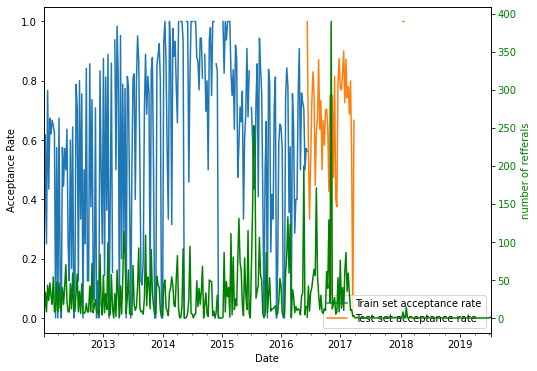

In [270]:
# create a single plot
ax1= WEEKLY_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6))

# plot data from the second dataframe onto the same plot
WEEKLY_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax1)
ax2 = ax1.twinx()
# create a single plot
ax2= WEEKLY_data["Total"].plot(x='Date', y='Value', figsize=(8,6),color='green')

# plot data from the second dataframe onto the same plot
WEEKLY_data_train["Total"].plot(x='Date', y='Value', ax=ax2,color='green')

# set title and labels
ax1.set_xlabel('Date')
ax1.set_ylabel('Acceptance Rate')

ax2.set_ylabel('number of refferals',color='green')
ax2.tick_params(axis="y", labelcolor='green')
ax1.legend(['Train set acceptance rate', 'Test set acceptance rate'])

# display the plot
plt.show()


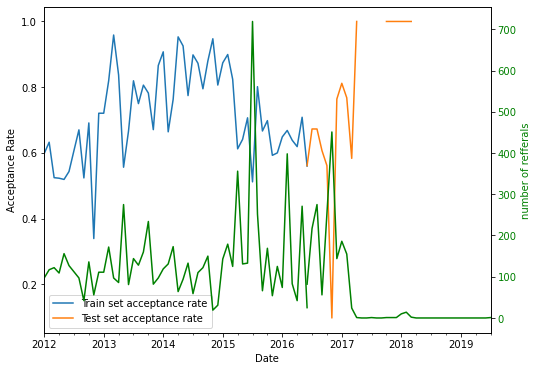

In [271]:
# create a single plot
ax1= monthly_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
monthly_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax1)
ax2 = ax1.twinx()
# create a single plot
ax2= monthly_data["Total"].plot(x='Date', y='Value', figsize=(8,6),color='green')

# plot data from the second dataframe onto the same plot
monthly_data_train["Total"].plot(x='Date', y='Value', ax=ax2,color='green')

# set title and labels
ax1.set_xlabel('Date')
ax1.set_ylabel('Acceptance Rate')

ax2.set_ylabel('number of refferals',color='green')
ax2.tick_params(axis="y", labelcolor='green')
ax1.legend(['Train set acceptance rate', 'Test set acceptance rate'])

# display the plot
plt.show()




##  text variables

In [272]:
data=alertP1.copy()
data=data[data['text_length']>0]
data=data.sort_values('DATA_RETORNO')
# compute the number of rows to select
n = int(len(data) * 0.8)

# select the first 80% of rows using slicing
first_80_percent_df = data.iloc[:n]
#select the last 20%
last_20_percent_df=data.iloc[n:]
last_20_percent_df['DATA_RETORNO']


1559   2016-05-16
196    2016-05-17
1381   2016-05-18
360    2016-05-19
1266   2016-05-19
          ...    
1385   2017-03-12
1227   2017-03-20
575    2018-01-17
154    2018-03-08
142    2019-07-10
Name: DATA_RETORNO, Length: 322, dtype: datetime64[ns]

In [273]:
#area distribution
first_80_percent_df["total"]=1
first_80_percent_df["result"]=first_80_percent_df["result"].astype(int)
area=first_80_percent_df.groupby("area")["result","total"].sum()
area["acc_rate"]=area["result"]/area["total"]
area

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/3898121379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_80_percent_df["total"]=1
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/3898121379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_80_percent_df["result"]=first_80_percent_df["result"].astype(int)
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/3898121379.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, us

,result,total,acc_rate
area,,,
inside area,598,750,0.797333
outside area,326,537,0.607076


In [274]:
#area distribution
last_20_percent_df["total"]=1
last_20_percent_df["result"]=last_20_percent_df["result"].astype(int)
area=last_20_percent_df.groupby("area")["result","total"].sum()
area["acc_rate"]=area["result"]/area["total"]
area

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/605608124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_20_percent_df["total"]=1
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/605608124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_20_percent_df["result"]=last_20_percent_df["result"].astype(int)
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/605608124.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a li

,result,total,acc_rate
area,,,
inside area,116,150,0.773333
outside area,59,172,0.343023


In [275]:
#step distribution
step=first_80_percent_df.groupby("step")["result","total"].sum()
step["acc_rate"]=step["result"]/step["total"]
step

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/1073180676.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  step=first_80_percent_df.groupby("step")["result","total"].sum()


,result,total,acc_rate
step,,,
1,758,1072,0.707090
2,141,184,0.766304
3+,25,31,0.806452


In [276]:
#step distribution
step=last_20_percent_df.groupby("step")["result","total"].sum()
step["acc_rate"]=step["result"]/step["total"]
step

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/968340453.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  step=last_20_percent_df.groupby("step")["result","total"].sum()


,result,total,acc_rate
step,,,
1,124,246,0.504065
2,39,60,0.650000
3+,12,16,0.750000


In [277]:
#speciality distribution
speciality=first_80_percent_df.groupby("DES_ESPECIALIDADE")["result","total"].sum()
speciality["acc_rate"]=speciality["result"]/speciality["total"]
speciality

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/2798061664.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  speciality=first_80_percent_df.groupby("DES_ESPECIALIDADE")["result","total"].sum()


,result,total,acc_rate
DES_ESPECIALIDADE,,,
APOIO DOENCAS NEUROLOGICAS CRONICAS,1,1,1.000000
DOENCAS DO MOVIMENTO,48,49,0.979592
DVC,6,6,1.000000
EPILEPSIA,67,67,1.000000
NEUROLOGIA,740,1102,0.671506
NEUROLOGIA - ESCLEROSE MULTIPLA,6,6,1.000000
NEUROLOGIA DO COMPORTAMENTO,56,56,1.000000


In [278]:
#speciality distribution
speciality=last_20_percent_df.groupby("DES_ESPECIALIDADE")["result","total"].sum()
speciality["acc_rate"]=speciality["result"]/speciality["total"]
speciality

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/637592297.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  speciality=last_20_percent_df.groupby("DES_ESPECIALIDADE")["result","total"].sum()


,result,total,acc_rate
DES_ESPECIALIDADE,,,
DOENCAS DO MOVIMENTO,2,2,1.000000
DVC,3,3,1.000000
EPILEPSIA,2,2,1.000000
NEUROLOGIA,164,309,0.530744
NEUROLOGIA - CEFALEIAS,1,1,1.000000
NEUROLOGIA - ESCLEROSE MULTIPLA,1,1,1.000000
NEUROLOGIA DO COMPORTAMENTO,2,4,0.500000


In [279]:
#unit distribution
unit=first_80_percent_df.groupby("unit")["result","total"].sum()
unit["acc_rate"]=unit["result"]/unit["total"]
unit

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/4162534458.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unit=first_80_percent_df.groupby("unit")["result","total"].sum()


,result,total,acc_rate
unit,,,
CS,195,253,0.770751
HOSP,287,495,0.579798
UCSP,72,99,0.727273
USF,370,440,0.840909


In [280]:
#unit distribution
unit=last_20_percent_df.groupby("unit")["result","total"].sum()
unit["acc_rate"]=unit["result"]/unit["total"]
unit

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/2842146245.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unit=last_20_percent_df.groupby("unit")["result","total"].sum()


,result,total,acc_rate
unit,,,
CS,38,49,0.775510
HOSP,53,162,0.327160
UCSP,15,20,0.750000
USF,69,91,0.758242


In [281]:
data=alertP1.copy()
data=data[data['text_length']>0]
data=data.sort_values('DATA_RECEPCAO')
# compute the number of rows to select
n = int(len(data) * 0.8)

# select the first 80% of rows using slicing
first_80_percent_data_recepcao_df = data.iloc[:n]
#select the last 20%
last_20_percent_data_recepcao_df=data.iloc[n:]
last_20_percent_data_recepcao_df['DATA_RECEPCAO']

1765   2016-01-19
629    2016-01-19
175    2016-01-20
552    2016-01-20
898    2016-01-21
          ...    
1606   2016-12-22
1177   2016-12-23
1335   2016-12-23
1332   2016-12-28
1227   2016-12-28
Name: DATA_RECEPCAO, Length: 322, dtype: datetime64[ns]

In [282]:
#area
first_80_percent_data_recepcao_df["total"]=1
first_80_percent_data_recepcao_df["result"]=first_80_percent_data_recepcao_df["result"].astype(int)
area=first_80_percent_data_recepcao_df.groupby("area")["result","total"].sum()
area["acc_rate"]=area["result"]/area["total"]
area

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/2381604059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_80_percent_data_recepcao_df["total"]=1
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/2381604059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_80_percent_data_recepcao_df["result"]=first_80_percent_data_recepcao_df["result"].astype(int)
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/2381604059.py:4: FutureWarning: Indexing with multiple keys (implicitly converted 

,result,total,acc_rate
area,,,
inside area,567,704,0.805398
outside area,321,583,0.550600


In [283]:
#area
last_20_percent_data_recepcao_df["total"]=1
last_20_percent_data_recepcao_df["result"]=last_20_percent_data_recepcao_df["result"].astype(int)
area=last_20_percent_data_recepcao_df.groupby("area")["result","total"].sum()
area["acc_rate"]=area["result"]/area["total"]
area

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/3171673711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_20_percent_data_recepcao_df["total"]=1
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/3171673711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_20_percent_data_recepcao_df["result"]=last_20_percent_data_recepcao_df["result"].astype(int)
C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/3171673711.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to 

,result,total,acc_rate
area,,,
inside area,147,196,0.750000
outside area,64,126,0.507937


In [284]:
#step distribution
step=first_80_percent_data_recepcao_df.groupby("step")["result","total"].sum()
step["acc_rate"]=step["result"]/step["total"]
step

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/3730811068.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  step=first_80_percent_data_recepcao_df.groupby("step")["result","total"].sum()


,result,total,acc_rate
step,,,
1,734,1082,0.678373
2,134,179,0.748603
3+,20,26,0.769231


In [285]:
#step distribution
step=last_20_percent_data_recepcao_df.groupby("step")["result","total"].sum()
step["acc_rate"]=step["result"]/step["total"]
step

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/2810577474.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  step=last_20_percent_data_recepcao_df.groupby("step")["result","total"].sum()


,result,total,acc_rate
step,,,
1,148,236,0.627119
2,46,65,0.707692
3+,17,21,0.809524


In [286]:
#speciality distribution
speciality=first_80_percent_data_recepcao_df.groupby("DES_ESPECIALIDADE")["result","total"].sum()
speciality["acc_rate"]=speciality["result"]/speciality["total"]
speciality

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/1316782301.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  speciality=first_80_percent_data_recepcao_df.groupby("DES_ESPECIALIDADE")["result","total"].sum()


,result,total,acc_rate
DES_ESPECIALIDADE,,,
APOIO DOENCAS NEUROLOGICAS CRONICAS,1,1,1.000000
DOENCAS DO MOVIMENTO,46,47,0.978723
DVC,6,6,1.000000
EPILEPSIA,65,65,1.000000
NEUROLOGIA,710,1107,0.641373
NEUROLOGIA - ESCLEROSE MULTIPLA,5,5,1.000000
NEUROLOGIA DO COMPORTAMENTO,55,56,0.982143


In [287]:
#speciality distribution
speciality=last_20_percent_data_recepcao_df.groupby("DES_ESPECIALIDADE")["result","total"].sum()
speciality["acc_rate"]=speciality["result"]/speciality["total"]
speciality

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/4179970827.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  speciality=last_20_percent_data_recepcao_df.groupby("DES_ESPECIALIDADE")["result","total"].sum()


,result,total,acc_rate
DES_ESPECIALIDADE,,,
DOENCAS DO MOVIMENTO,4,4,1.000000
DVC,3,3,1.000000
EPILEPSIA,4,4,1.000000
NEUROLOGIA,194,304,0.638158
NEUROLOGIA - CEFALEIAS,1,1,1.000000
NEUROLOGIA - ESCLEROSE MULTIPLA,2,2,1.000000
NEUROLOGIA DO COMPORTAMENTO,3,4,0.750000


In [288]:
#unit distribution
unit=first_80_percent_data_recepcao_df.groupby("unit")["result","total"].sum()
unit["acc_rate"]=unit["result"]/unit["total"]
unit

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/162511894.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unit=first_80_percent_data_recepcao_df.groupby("unit")["result","total"].sum()


,result,total,acc_rate
unit,,,
CS,182,233,0.781116
HOSP,282,541,0.521257
UCSP,70,95,0.736842
USF,354,418,0.846890


In [289]:
#unit distribution
unit=last_20_percent_data_recepcao_df.groupby("unit")["result","total"].sum()
unit["acc_rate"]=unit["result"]/unit["total"]
unit

C:\Users\MAROUA~1\AppData\Local\Temp/ipykernel_18660/548050934.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unit=last_20_percent_data_recepcao_df.groupby("unit")["result","total"].sum()


,result,total,acc_rate
unit,,,
CS,51,69,0.739130
HOSP,58,116,0.500000
UCSP,17,24,0.708333
USF,85,113,0.752212


In [290]:
merged = pd.merge(last_20_percent_data_recepcao_df,last_20_percent_df , on='COD_REFERENCIA', how='inner')
merged

,ID_DOENTE_x,PROCESSO_x,COD_REFERENCIA,COD_PZ_x,COD_UNID_SAUDE_PROV_x,UNID_PROV_x,TIPO_UNID_x,PROVENIENCIA_x,COD_CTH_PRIOR_x,CTH_PRIOR_x,...,mês_saida_y,ano_saida_y,Texto_y,result_y,text_length_y,area_y,step_y,speciality_type_y,unit_y,total_y
0,ESESEE,MIVDCLC,LSHLOUPL,,0,,OUTRA,SAM,,unknown,...,3,2017,Doente seguido em consulta de Reumatologia por...,1,283,outside area,1,General Neurology,HOSP,1
1,SFEFDE,LLEEJV,LSHLPHVO,,0,,OUTRA,SAM,,unknown,...,2,2016,Doente com perturbação bipolar que desde há ce...,0,159,outside area,1,General Neurology,HOSP,1
2,GCFHF,LLBNCD,LSHLPROO,,0,,OUTRA,SAM,,unknown,...,10,2016,"Puérpera de 5 dias, com hemicefaleia e tontura...",0,140,outside area,1,General Neurology,HOSP,1
3,GGCBF,LLCJNVV,LSHLQOLL,,0,,OUTRA,SAM,,unknown,...,3,2016,HTA; Dislipidemia; Hiperuricemia Protese valv...,0,367,outside area,1,General Neurology,HOSP,1
4,SBSFSH,VLMNVML,LSHLRSRT,,0,,OUTRA,SAM,,unknown,...,12,2016,"TCE em 2014, com focos de contusão fronto-temp...",1,267,outside area,2,General Neurology,HOSP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,FFDSBH,MILLLCJ,LSHUVULH,ZESCCSSF,3152401,UCSP CORROIOS,CS/USF,CTH,2,Prioritário,...,1,2017,Doente que desde 2013 tem disfagia para sólido...,1,532,inside area,1,General Neurology,UCSP,1
250,ZHZFA,ILBIBCL,LSHVHLHP,ZESBFBCB,3152400,CORROIOS (SEDE),CS/USF,CTH,3,Normal,...,4,2017,24A Sequelas de parto / anoxia cerebral foi se...,1,589,inside area,3+,General Neurology,CS,1
251,EBBCSA,"I,IJME+LI",LSHVHLLH,ZESBAHAD,3150571,USF SOBREDA-CS COSTA CAPARICA,CS/USF,CTH,3,Normal,...,4,2017,"Sra de 66 anos, seguida em Psiquiatria por doe...",1,486,inside area,1,General Neurology,USF,1
252,FDSADA,IIJMMNJ,LSHVHSUR,ZESGGDFH,3150572,USF MONTE DA CAPARICA,CS/USF,CTH,,unknown,...,2,2017,Doente com episódios frequentes de desorientaç...,0,483,inside area,1,General Neurology,USF,1


In [291]:
df = first_80_percent_df.copy()
df['Total'] = 1
df=df[["DATA_RETORNO","result","Total"]]
df["result"]=df["result"].astype(int)
df.set_index("DATA_RETORNO", inplace=True)
df

,result,Total
DATA_RETORNO,,
2012-01-10,1,1
2012-01-11,0,1
2012-01-12,1,1
2012-01-13,0,1
2012-01-17,1,1
...,...,...
2016-05-16,1,1
2016-05-16,0,1
2016-05-16,1,1


In [292]:
#WEEKLY referral distribution for all sample
WEEKLY_data = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data["Acceptance_Rate"]=WEEKLY_data["result"]/WEEKLY_data["Total"]
#Monthly distribution
monthly_data = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data["Acceptance_Rate"]=monthly_data["result"]/monthly_data["Total"]
WEEKLY_data

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2012-01-15,2,4,0.500000
2012-01-22,1,3,0.333333
2012-01-29,10,11,0.909091
2012-02-05,2,5,0.400000
2012-02-12,5,6,0.833333
...,...,...,...
2016-04-24,1,1,1.000000
2016-05-01,0,0,NaN
2016-05-08,1,1,1.000000


In [293]:
df =last_20_percent_df.copy()
df['Total'] = 1
df=df[["DATA_RETORNO","result","Total"]]
df["result"]=df["result"].astype(int)
df.set_index("DATA_RETORNO", inplace=True)
df

,result,Total
DATA_RETORNO,,
2016-05-16,1,1
2016-05-17,0,1
2016-05-18,0,1
2016-05-19,0,1
2016-05-19,1,1
...,...,...
2017-03-12,1,1
2017-03-20,1,1
2018-01-17,1,1


In [294]:
#WEEKLY referral distribution for all sample
WEEKLY_data_train = df.resample('W').agg({'result': 'sum', 'Total': 'sum'})
WEEKLY_data_train["Acceptance_Rate"]=WEEKLY_data_train["result"]/WEEKLY_data_train["Total"]
#Monthly distribution
monthly_data_train = df.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data_train["Acceptance_Rate"]=monthly_data_train["result"]/monthly_data_train["Total"]
WEEKLY_data_train

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2016-05-22,16,24,0.666667
2016-05-29,1,1,1.000000
2016-06-05,1,2,0.500000
2016-06-12,5,6,0.833333
2016-06-19,2,5,0.400000
...,...,...,...
2019-06-16,0,0,NaN
2019-06-23,0,0,NaN
2019-06-30,0,0,NaN


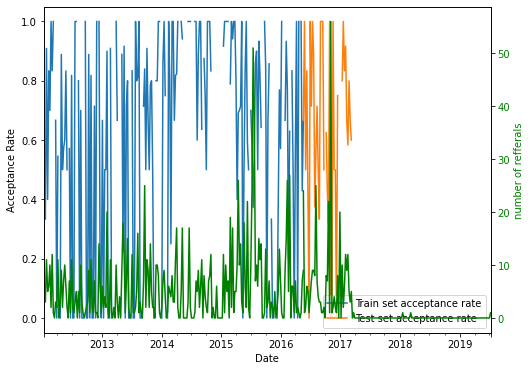

In [295]:
# create a single plot
ax1= WEEKLY_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
WEEKLY_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax1)
ax2 = ax1.twinx()
# create a single plot
ax2= WEEKLY_data["Total"].plot(x='Date', y='Value', figsize=(8,6),color='green')

# plot data from the second dataframe onto the same plot
WEEKLY_data_train["Total"].plot(x='Date', y='Value', ax=ax2,color='green')

# set title and labels
ax1.set_xlabel('Date')
ax1.set_ylabel('Acceptance Rate')

ax2.set_ylabel('number of refferals',color='green')
ax2.tick_params(axis="y", labelcolor='green')
ax1.legend(['Train set acceptance rate', 'Test set acceptance rate'])

# display the plot
plt.show()

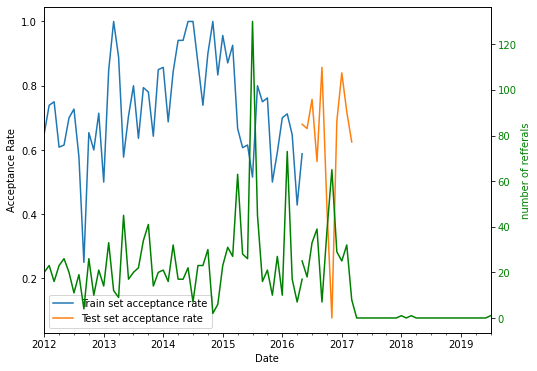

In [296]:
# create a single plot
ax1= monthly_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
monthly_data_train["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax1)
ax2 = ax1.twinx()
# create a single plot
ax2= monthly_data["Total"].plot(x='Date', y='Value', figsize=(8,6),color='green')

# plot data from the second dataframe onto the same plot
monthly_data_train["Total"].plot(x='Date', y='Value', ax=ax2,color='green')

# set title and labels
ax1.set_xlabel('Date')
ax1.set_ylabel('Acceptance Rate')

ax2.set_ylabel('number of refferals',color='green')
ax2.tick_params(axis="y", labelcolor='green')
ax1.legend(['Train set acceptance rate', 'Test set acceptance rate'])

# display the plot
plt.show()